# Ejercicio regresión polinomial

#### Utilizando los modelos de regresión vistos hasta ahora, genera el modelo que mejor se adapte a los datos adjuntos. La pregunta objetivo es: ¿Cuál es la longitud del pez bluegill en función de su edad?


#### En 1981, 78 diferentes peces bluegills fueron aleatoriamente caracterizados según su longitud y edad de un lago de Minnesota. Los investigadores midieron y grabaron los datos que se adjuntan. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

### Importar y visualizar los datos.

In [2]:
with open('Datos mojarra americana.txt') as doc:
  data = doc.readlines()

age = []
length = []

for column in data[1:]:
  age.append(int(column.split('\t')[0]))
  length.append(int(column.split('\t')[1].split('\n')[0]))

print(data)
print(len(data))

print(age)
print(len(age))

print(length)
print(len(length))

['age\tlength\n', '1\t67\n', '1\t62\n', '2\t109\n', '2\t83\n', '2\t91\n', '2\t88\n', '3\t137\n', '3\t131\n', '3\t122\n', '3\t122\n', '3\t118\n', '3\t115\n', '3\t131\n', '3\t143\n', '3\t142\n', '2\t123\n', '3\t122\n', '4\t138\n', '4\t135\n', '4\t146\n', '4\t146\n', '4\t145\n', '4\t145\n', '4\t144\n', '4\t140\n', '4\t150\n', '4\t152\n', '4\t157\n', '4\t155\n', '4\t153\n', '4\t154\n', '4\t158\n', '4\t162\n', '4\t161\n', '4\t162\n', '4\t165\n', '4\t171\n', '5\t171\n', '4\t162\n', '4\t169\n', '4\t167\n', '5\t188\n', '2\t100\n', '2\t109\n', '4\t150\n', '3\t140\n', '4\t170\n', '3\t150\n', '4\t140\n', '4\t140\n', '4\t150\n', '4\t150\n', '3\t140\n', '3\t150\n', '3\t150\n', '4\t150\n', '4\t160\n', '3\t140\n', '4\t150\n', '5\t170\n', '4\t150\n', '5\t150\n', '4\t150\n', '4\t150\n', '3\t150\n', '5\t150\n', '5\t160\n', '4\t140\n', '5\t160\n', '3\t130\n', '4\t160\n', '3\t130\n', '4\t170\n', '6\t170\n', '4\t160\n', '5\t180\n', '4\t160\n', '4\t170']
79
[1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3

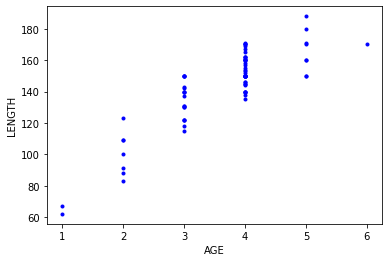

In [3]:
#Visualizamos los datos
plt.plot(age, length, 'b.')
plt.xlabel("AGE")
plt.ylabel("LENGTH")
plt.show()

### Dividir los datos en set de entrenamiento y set de test

Al ser un dataset pequeño, utilizaremos dos planteamientos y compararemos cuál es la mejor estrategia:
* Estrategia 80-20 de manera aleatoria.
* Estrategia 80-20 para cada edad.

In [4]:
# Añadimos el 80% de los datos al set de entrenamiento.

x_train_random, x_test_random, y_train_random, y_test_random = train_test_split(age, length, test_size=0.2, random_state=5)

In [5]:
# Al ser un conjunto de datos reducido, analizaremos también otro procedimiento:
# añadir el 80% de los datos de cada edad al set de entrenamiento.
age_groupby_age = [[], [], [], [], [], []]
length_groupby_age = [[], [], [], [], [], []]

for index, age_element in enumerate(age):
  age_groupby_age[age_element - 1].append(age_element)
  length_groupby_age[age_element - 1].append(length[index])


x_train, x_test, y_train, y_test = [], [], [], []

# Solamente tenemos un dato de peces de 6 años, por lo tanto lo excluimos del split
# y lo introducimos manualmente como parte del training set.
for i in range (0, 5):
  x_train_element, x_test_element, y_train_element, y_test_element= train_test_split(age_groupby_age[i], length_groupby_age[i], test_size=0.2, random_state=5)
  
  x_train.extend(x_train_element); y_train.extend(y_train_element); x_test.extend(x_test_element); y_test.extend(y_test_element)

x_train.extend(age_groupby_age[5])
y_train.extend(length_groupby_age[5])

In [6]:
# Convertimos nuestros datos en el formato necesario para entrenar los modelos.
x_train = [[element] for element in x_train]; y_train = [[element] for element in y_train]
x_test = [[element] for element in x_test]; y_test = [[element] for element in y_test]

x_train_random = [[element] for element in x_train_random]; y_train_random = [[element] for element in y_train_random]
x_test_random = [[element] for element in x_test_random]; y_test_random = [[element] for element in y_test_random]

### Regresión lineal

In [7]:
#Creamos variable de regresión lineal
lr = LinearRegression(); lr_random = LinearRegression()

# Buscamos los parámetros óptimos del modelo
lr.fit(x_train, y_train); lr_random.fit(x_train_random, y_train_random)

#Predecimos las variables de salida
y_pred = lr.predict(x_test); y_pred_random = lr_random.predict(x_test_random)

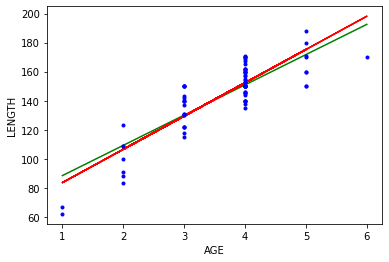

In [8]:
# Graficamos los resultados.
plt.plot(x_train, lr.predict(x_train), color="g")
plt.plot(x_train_random, lr_random.predict(x_train_random), color="r")

plt.plot(age, length, "b.")
plt.xlabel("AGE")
plt.ylabel("LENGTH")
plt.show()

In [9]:
from sklearn.metrics import mean_squared_error

# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error) 
# y el R Cuadrado o Coeficiente de Determinación (R2)
mse_1 = mean_squared_error(y_true = y_test, y_pred = y_pred)
mse_random_1 = mean_squared_error(y_true = y_test_random, y_pred = y_pred_random)

rmse_1 = np.sqrt(mse_1)
rmse_random_1 = np.sqrt(mse_random_1)

r2_1 = lr.score(x_test, y_test)
r2_random_1 = lr_random.score(x_test_random, y_test_random)

print(rmse_1, r2_1)
print(rmse_random_1, r2_random_1)

12.121374640279297 0.8222462686246995
9.981236506985304 0.6211748998077311


In [10]:
# Coeficientes de los dos modelos
print(lr.coef_, lr.intercept_)
print(lr_random.coef_, lr_random.intercept_)

[[20.83098592]] [67.56971831]
[[22.91504219]] [60.65493163]


### Regresión polinomial de 2º grado

In [11]:
#Aplicamos regresión polinomial de 2º grado
poly = PolynomialFeatures(degree=2, include_bias=True)
poly_random = PolynomialFeatures(degree=2, include_bias=True)

x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)

x_train_trans_random = poly_random.fit_transform(x_train_random)
x_test_trans_random = poly_random.transform(x_test_random)

In [12]:
lr.fit(x_train_trans, y_train)
y_new = lr.predict(x_test_trans)
mse_2 = mean_squared_error(y_true = y_test, y_pred = y_new)

lr_random.fit(x_train_trans_random, y_train_random)
y_new_random = lr.predict(x_test_trans_random)
mse_random_2 = mean_squared_error(y_true = y_test_random, y_pred = y_new_random)

rmse_2 = np.sqrt(mse_2)
rmse_random_2 = np.sqrt(mse_random_2)

r2_2 = lr.score(x_test_trans, y_test)
r2_random_2 = lr_random.score(x_test_trans_random, y_test_random)

print(rmse_2, r2_2)
print(rmse_random_2, r2_random_2)

10.492125358082529 0.8668191080772005
10.09045903506881 0.6090400019431232


In [13]:
# Coeficientes del mejor de los dos modelos
lr.coef_, lr.intercept_

(array([[ 0.        , 55.5374486 , -4.99829381]]), array([11.45507043]))

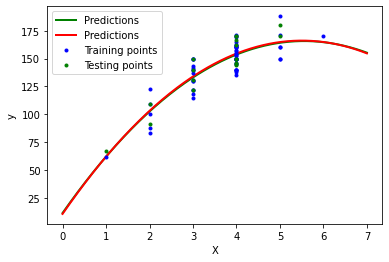

In [14]:
X_new = np.linspace(0, 7, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

X_new_random = np.linspace(0, 7, 200).reshape(200, 1)
X_new_poly_random = poly_random.transform(X_new_random)
y_new_random = lr_random.predict(X_new_poly_random)

plt.plot(X_new, y_new, "g-", linewidth=2, label="Predictions")
plt.plot(X_new_random, y_new_random, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

### Regresión polinomial de 3º grado

In [15]:
#Aplicamos regresión polinomial de 2º grado
poly = PolynomialFeatures(degree=3, include_bias=True)
poly_random = PolynomialFeatures(degree=3, include_bias=True)

x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)

x_train_trans_random = poly_random.fit_transform(x_train_random)
x_test_trans_random = poly_random.transform(x_test_random)

In [16]:
lr.fit(x_train_trans, y_train)
y_new = lr.predict(x_test_trans)
mse_3 = mean_squared_error(y_true = y_test, y_pred = y_new)

lr_random.fit(x_train_trans_random, y_train_random)
y_new_random = lr.predict(x_test_trans_random)
mse_random_3 = mean_squared_error(y_true = y_test_random, y_pred = y_new_random)

rmse_3 = np.sqrt(mse_3)
rmse_random_3 = np.sqrt(mse_random_3)

r2_3 = lr.score(x_test_trans, y_test)
r2_random_3 = lr_random.score(x_test_trans_random, y_test_random)

print(rmse_3, r2_3)
print(rmse_random_3, r2_random_3)

10.669630547198642 0.8622746957251973
10.102685610577632 0.6093630781452652


In [17]:
# Coeficientes del mejor de los dos modelos
lr.coef_, lr.intercept_

(array([[ 0.        , 69.48322175, -9.26618417,  0.40199208]]),
 array([-2.1146683]))

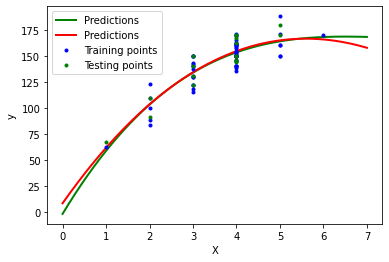

In [18]:
X_new = np.linspace(0, 7, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

X_new_random = np.linspace(0, 7, 200).reshape(200, 1)
X_new_poly_random = poly_random.transform(X_new_random)
y_new_random = lr_random.predict(X_new_poly_random)

plt.plot(X_new, y_new, "g-", linewidth=2, label="Predictions")
plt.plot(X_new_random, y_new_random, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

#### Analizando órdenes superiores observamos que no hay mejoría con el aumento del grado de la regresión.

In [19]:
for order in range(2, 11):
  poly = PolynomialFeatures(degree=order, include_bias=True)
  poly_random = PolynomialFeatures(degree=order, include_bias=True)

  x_train_trans = poly.fit_transform(x_train)
  x_test_trans = poly.transform(x_test)

  x_train_trans_random = poly_random.fit_transform(x_train_random)
  x_test_trans_random = poly_random.transform(x_test_random)

  lr.fit(x_train_trans, y_train)
  y_new = lr.predict(x_test_trans)
  mse_x = mean_squared_error(y_true = y_test, y_pred = y_new)

  lr_random.fit(x_train_trans_random, y_train_random)
  y_new_random = lr.predict(x_test_trans_random)
  mse_random_x = mean_squared_error(y_true = y_test_random, y_pred = y_new_random)

  rmse_x = np.sqrt(mse_x)
  rmse_random_x = np.sqrt(mse_random_x)

  r2_x = lr.score(x_test_trans, y_test)
  r2_random_x = lr_random.score(x_test_trans_random, y_test_random)

  print(rmse_x, r2_x)
  print(rmse_random_x, r2_random_x)
  print('\n')

10.492125358082529 0.8668191080772005
10.09045903506881 0.6090400019431232


10.669630547198642 0.8622746957251973
10.102685610577632 0.6093630781452652


10.686184893586011 0.8618469918603741
10.392311194190686 0.5563104289730916


10.569448014765138 0.8648488979092401
10.242377861292445 0.5681246141699405


10.569448014764147 0.8648488979092656
10.242377861292393 0.5681246141692797


10.569448014769723 0.8648488979091229
10.242377861301742 0.5681246141684162


10.569448014795752 0.8648488979084573
10.242377861339227 0.568124614170703


10.569448014738272 0.8648488979099273
10.242377861252697 0.5681246141699168


10.569448014854725 0.8648488979069491
10.24237786141738 0.568124614165251




### RESULTADO

Observamos que al ser un conjunto de datos muy reducido, obtenemos mejores resultados al asegurar que la división del train y test set se realiza de manera representativa.

In [20]:
resultados = pd.DataFrame( {"RSME": [rmse_1, rmse_2, rmse_3], 
                            "R2": [r2_1, r2_2, r2_3],
                            "RSME Random": [rmse_random_1, rmse_random_2, rmse_random_3],
                            "R2 Random": [r2_random_1, r2_random_2, r2_random_3]}, 
                          index = ["Regresión lineal", "Regresión polinómica grado 2", "Regresión polinómica grado 3"])

resultados

,RSME,R2,RSME Random,R2 Random
Regresión lineal,12.121375,0.822246,9.981237,0.621175
Regresión polinómica grado 2,10.492125,0.866819,10.090459,0.609040
Regresión polinómica grado 3,10.669631,0.862275,10.102686,0.609363


<br>

El mejor modelo es:


```
length = 55.5374486 * age  - 4.99829381 * age^2  + 11.45507043
```

